In [1]:
import pynucastro as pyna
import numpy as np
import matplotlib.pyplot as plt

## pynucastro: a library for visualizing and exploring nuclear reactions.

<img src="front.png" width=600 height=600 />


## The source:

- pynucastro is an open source nuclear network reaction manager, that provides visualization tools and and writes the reaction network.

- pynucastro is available in: https://github.com/pynucastro/pynucastro

### The Problem:

In nucleosynthesis, astrophysical calculations may face two important problems:

- To predict the molar fractions $Y_i$, and their rates, given an initial composition $Y_i(0)$, density $\rho$, and temperature $T$:

$$
\begin{equation}
\dfrac{d Y_i}{d t} = \left(\rho Y_A Y_B\; N_a\langle \sigma v \rangle _{A,B} + \cdots + \dfrac{\rho^2 Y_C^3}{3!}\;N_a^2 \langle \sigma v \rangle _{C,C,C} \right)_{i-\mathrm{formation}} - \left(\rho Y_i Y_D\; N_a\langle \sigma v \rangle _{i,D}+\cdots + \dfrac{\rho Y_i^2}{2!}\;N_a \langle \sigma v\rangle _{i,i} \right)_{i-\mathrm{anhiliation}}
\end{equation}
$$

- Provide a way to visualize the network from the ODE system.


### The Goals of Pynucastro:

- pynucastro, integrates the rate information from REACLIB, where each rate is characterized by one or several sets of constants $a_0$, $a_1$, ... $a_6$: $$N_a^{n-1}\langle \sigma v \rangle_{A_1, \cdots, A_n} = \exp\left( a_0 + \sum_{i=1}^5 a_i T^{(2i-5)/3} + a_6 \log T\right)$$

- pynucastro, can perform detailed balance calculations to compute the inverse rate given a REACLIB forward rate and apply Coulomb screening corrections over the rates.

- Finally, pynucastro compute the composition in the nuclear statistical equilibrium (NSE) state. This state is achieved under high temperature network integration

### The Core Classes:

pynucastro is composed by four important main classes:

1. `Rate:` The Rate class hold the temperature dependence of each rate object and their interface representation.

2. `Nucleus:` The Nucleus class is a container with all the required information of each nucleus objects, including the atomic mass number, the atomic number, the nucleus spin, the atomic weight, and the partition function objects.

3. `Library:` The Library class is a container of rates, that can be linked based on the desired nucleus to constitute the reaction network.

4. `RateCollection:` The RateCollection class, provides the visualization routines of the network, as the screening and NSE composition determination.

### A simple example:

Let us provide a simple construction of the full CNO cycle chain in pynucastro:

In [2]:
lib = pyna.ReacLibLibrary()

r1 = lib.get_rate_by_name("n15(p,a)c12")
r2 = lib.get_rate_by_name("o17(p,a)n14")
r3 = lib.get_rate_by_name("o14(,)n14")
r4 = lib.get_rate_by_name("n13(p,g)o14")

nuclist = ['c12', 'c13', 'n14', 'n13', 'n15' 'o14', 'o15', 'o16', 'o17', 'f17', 'p']
reac = lib.linking_nuclei(nuclist=nuclist, with_reverse=False)
reac += pyna.Library(rates=[r1,r2,r3,r4])

rc = pyna.RateCollection(libraries=reac)
print(reac)

C12 + p ⟶ N13 + 𝛾              [Q =   1.94 MeV] (c12 + p --> n13 <ls09_reaclib__>)
C13 + p ⟶ N14 + 𝛾              [Q =   7.55 MeV] (c13 + p --> n14 <nacr_reaclib__>)
N13 + p ⟶ O14 + 𝛾              [Q =   4.63 MeV] (n13 + p --> o14 <lg06_reaclib__>)
N13 ⟶ C13 + e⁺ + 𝜈             [Q =   2.22 MeV] (n13 --> c13 <wc12_reaclib_weak_>)
N14 + p ⟶ O15 + 𝛾              [Q =   7.30 MeV] (n14 + p --> o15 <im05_reaclib__>)
N15 + p ⟶ He4 + C12            [Q =   4.97 MeV] (n15 + p --> he4 + c12 <nacr_reaclib__>)
N15 + p ⟶ O16 + 𝛾              [Q =  12.13 MeV] (n15 + p --> o16 <li10_reaclib__>)
O14 ⟶ N14 + e⁺ + 𝜈             [Q =   5.14 MeV] (o14 --> n14 <wc12_reaclib_weak_>)
O15 ⟶ N15 + e⁺ + 𝜈             [Q =   2.75 MeV] (o15 --> n15 <wc12_reaclib_weak_>)
O16 + p ⟶ F17 + 𝛾              [Q =   0.60 MeV] (o16 + p --> f17 <ia08_reaclib__>)
O17 + p ⟶ He4 + N14            [Q =   1.19 MeV] (o17 + p --> he4 + n14 <il10_reaclib__>)
F17 ⟶ O17 + e⁺ + 𝜈             [Q =   2.76 MeV] (f17 --> o17 <wc12_reaclib_

### The Python and C++ RHS Interface

Once, we have created our `RateCollection` object we have two options for the RHS interfacing process:

- To write the network in Python:

In [3]:
pynet = pyna.PythonNetwork(libraries=reac)
pynet.write_network('example.py')

- To write the network in to C++:

In [4]:
cnet = pyna.AmrexAstroCxxNetwork(libraries=reac)
cnet.write_network()

### Network Visualization Tool: `plot()` 

- Let us introduce our first visualization technique: `plot()`. 

- This method constructs a graph with nodes as nuclei, and edges as reaction rates. 

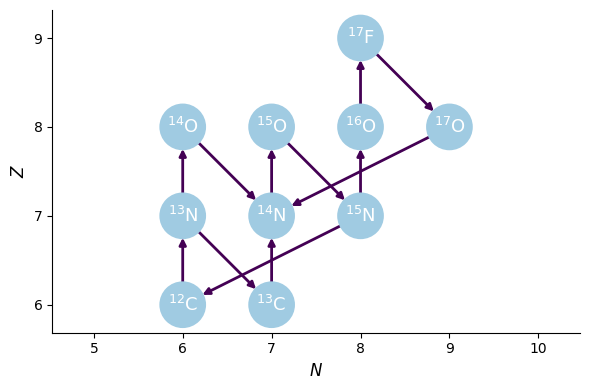

In [25]:
fig = rc.plot(outfile='front.png', size=(600,400))

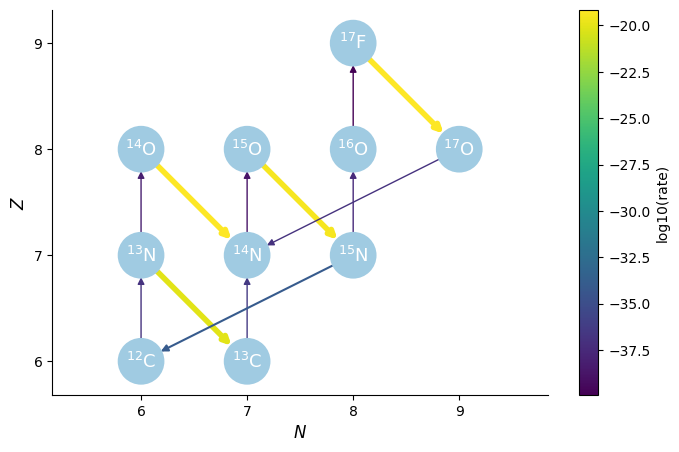

In [5]:
comp = pyna.Composition(rc.get_nuclei())
comp.set_solar_like
fig = rc.plot(comp=comp, rho=1.0e4, T=5.0e7, size=(800,500))

- If we increase the temperature: 

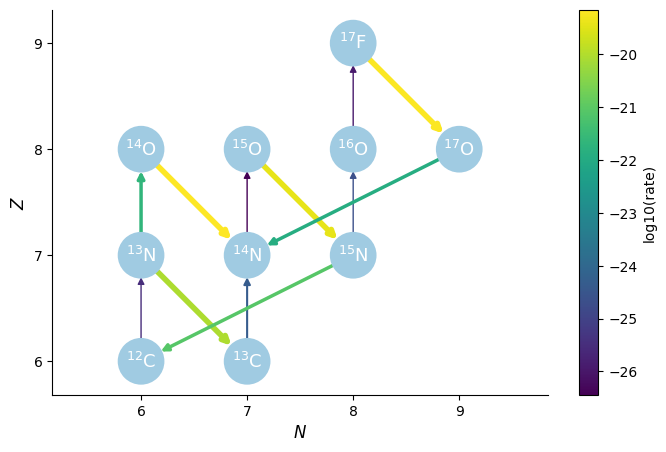

In [6]:
comp = pyna.Composition(rc.get_nuclei())
comp.set_solar_like
fig = rc.plot(comp=comp, rho=1.0e4, T=6.0e9, size=(800,500))

### Network Visualization Tool: `plot_jacobian()` 

Another visualization tool, allow us to identify the Jacobian entries. This tool may very useful to define the best integration scheme when we couple nuclear reactions to hydrodynamics. 

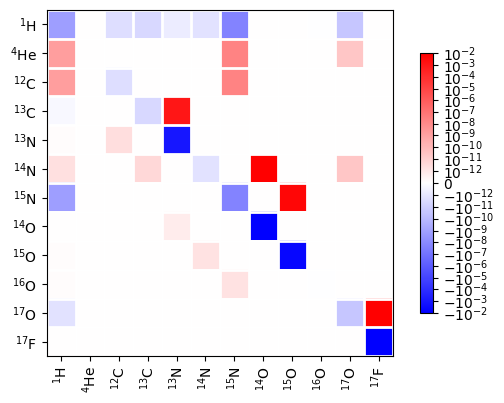

In [7]:
fig = rc.plot_jacobian(rho=1.0e3, T=5.0e8, comp=comp, size=(700,450))

## Integrating a network

- Once we have written our network, we can load and integrate our network by the use, for example, of the scipy BDF method, designed for stiff ODE systems.

In [8]:
import example
from scipy.integrate import solve_ivp

- Setting the molar fraction initial condition:

In [9]:
Z = 0.02
rem = Z / (example.nnuc - 2)

X0 = np.zeros(example.nnuc)
X0[example.jp] = 0.7
X0[example.jhe4] = 0.3 - Z
X0[example.jc12] = rem
X0[example.jc13] = rem
X0[example.jn13] = rem
X0[example.jn14] = rem
X0[example.jn15] = rem
X0[example.jo14] = rem
X0[example.jo15] = rem
X0[example.jo16] = rem
X0[example.jo17] = rem
X0[example.jf17] = rem

X0 /= np.sum(X0)
Y0 = X0 / example.A

- and the temperature-density pair:

In [10]:
rho = 1.0e3
T = 5.0e9

- we can integrate the network as follows:

In [11]:
tmax = 1.0
sol = solve_ivp(example.rhs, [0, tmax], Y0, method="BDF",
                dense_output=True, args=(rho, T), rtol=1.e-10, atol=1.e-10, jac=example.jacobian)

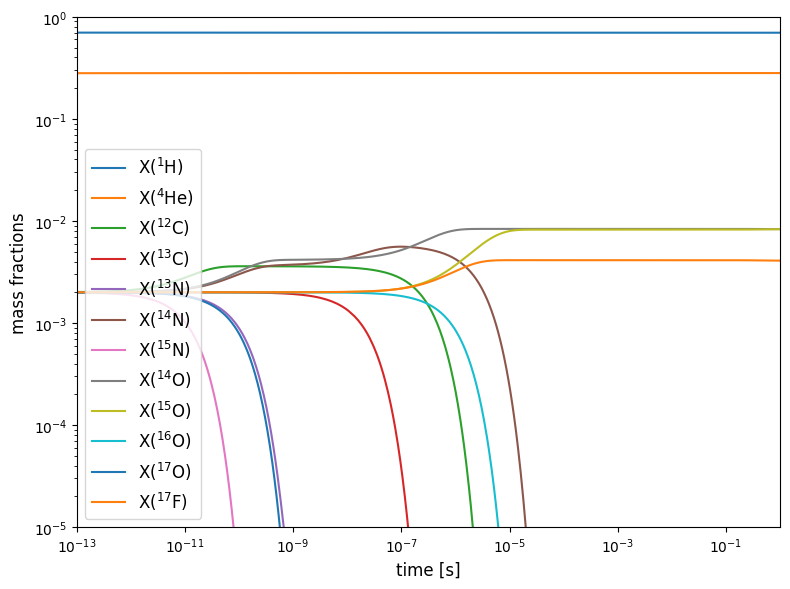

In [12]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

for i in range(example.nnuc):
    ax.loglog(sol.t, sol.y[i,:] * example.A[i], label=rf"X(${pyna.Nucleus(example.names[i]).pretty}$)")

ax.legend(loc='lower left', fontsize=12)
ax.set_xlim(1.0e-13, tmax)
ax.set_ylim(10.e-6, 1.0)
ax.set_xlabel(f"time [s]", fontsize=12)
ax.set_ylabel(f"mass fractions", fontsize=12)

fig.set_size_inches((8, 6))
fig.tight_layout()
fig.savefig('example.png', bbox_inches="tight")

- and plot it, as follows:

<img src="example.png" width=600 height=600 />


### Reverse Rates and Partition Functions:

- In REACLIB, a rate that has been detailed balance from another, is labeled by `__reaclib__reverse`. However, we may want to perform the detailed balance calculations ourselves, to include several screening routines or/and partition functions in high temperature regimes.

- If a rate $$A_1 + \cdots A_n \rightarrow B_1 + B_2 + \cdots B_m$$ is selected, and we want to compute its inverse rate by detailed balance, we have implemenented the `DerivedRate` class. 

- For example, if we want to study the iron group nucleosynthesis in high temperatures regimes $T_9 \sim 0.01 - 100$, we should include the partition function behaviour in the nuclei.

In [13]:
all_reactions = pyna.ReacLibLibrary()
fwd_reactions = all_reactions.derived_forward()

all_nuclei = ['n', 'p', 'he4', 'cr48', 'cr49', 'cr55', 'cr56', 'mn51', 
              'mn52', 'mn53', 'mn54', 'mn55',  'mn56', 'fe52', 'fe53', 
              'fe54', 'fe55', 'fe56', 'co55', 'co56', 'ni56']

fwd_rates_lib = fwd_reactions.linking_nuclei(nuclist=all_nuclei, with_reverse=False)

derived = []
for r in fwd_rates_lib.get_rates():
    d = pyna.DerivedRate(rate=r, compute_Q=False, use_pf=True)
    derived.append(d)

der_rates_lib = pyna.Library(rates=derived)
full_library = fwd_rates_lib + der_rates_lib

rc = pyna.PythonNetwork(libraries=full_library, symmetric_screening=False, do_screening=True)

- Let us consider the higher portion of the iron group, and integrate the network with `__reaclib__reverse` and `DerivedRate` rates:

<img src="comparison_pf_higher_nuc.png" width=600 height=600 />

### Screening Routines

Additionally, pynucastro supports several routines that introduce screening modifications in the rates at the time of writing the network:

In [14]:
pynet = pyna.PythonNetwork(libraries=full_library, symmetric_screening=False, do_screening=True)
pynet.write_network('iron.py')

- Three screening fits are provided in pynucastro. Only one fit is compatible with NSE: `potekhin_1998()`. 

- The remaining two routines `chugunov_2007`, `chugunov_2009`, can be made compatible with NSE by including appropiate quantum corrections (Future work!).

### NSE Composition  

- The NSE state occurs when the derived and forward rates are balanced and in equilibrium. 

- This composition is the result of estacionary state of the network integration in high temperature regimes $T_9 \sim 5.0$. 

- In NSE, the inverse and the forward rates are balanced each other in equilibrium.

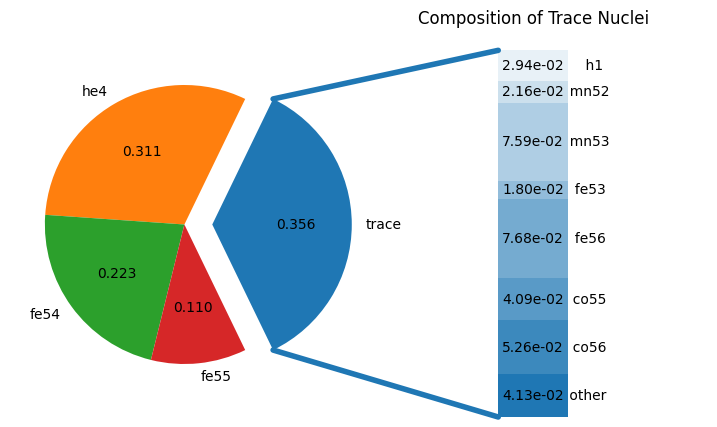

In [24]:
comp, sol = pynet.get_comp_nse(rho=1.0e8, T=7.0e9, ye=0.50, use_coulomb_corr=True, return_sol=True)
fig = comp.plot()

### Summary

- As we have seen, pynucastro provides visualization tools as an interface to write the network RHS.

- The code is open source and we welcome contributions: https://github.com/pynucastro/pynucastro .

- We submitted a manuscript on: https://arxiv.org/pdf/2210.09965.pdf
